In [58]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from vaegan_fc import *
from vaegan import VAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [219]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [220]:
tf.reset_default_graph()

In [221]:
# Train
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)

# as the number of labeled examples decreases, need alpha to decrease as well?
model = VAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 1e-3, num_epochs = 10, load=False, #lr_decay=0.95, lr_decay_freq=1000,
          checkpoint_name='test'
)

In [230]:
model.train()

Epoch 11 loss: 112.529835746 (time: 112.51227808 s)
Epoch 12 loss: 111.965140395 (time: 114.190663815 s)
Epoch 13 loss: 111.480199266 (time: 106.790805817 s)
Epoch 14 loss: 111.25761673 (time: 121.021294117 s)
Epoch 15 loss: 110.754780565 (time: 107.63510704 s)
Epoch 16 loss: 110.373756492 (time: 106.094510078 s)
Epoch 17 loss: 110.180291984 (time: 106.056195974 s)
Epoch 18 loss: 109.810701447 (time: 107.342498064 s)
Epoch 19 loss: 109.418388325 (time: 109.822228909 s)
Epoch 20 loss: 109.063849099 (time: 108.596965075 s)
18.3344419479 min


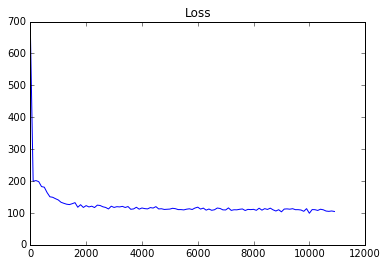

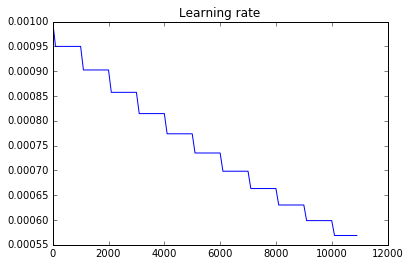

In [231]:
log = model.log
log = np.array(log).T
plt.plot(log[0,], log[1,])
plt.title('Loss')
plt.show()
plt.plot(log[0,], log[2,])
plt.title('Learning rate')
plt.show()

In [247]:
generated_images = model.generate()

In [233]:
x = mnist.test.images[xrange(100)]
x_dis_real = sess.run(model.dis_real, feed_dict={model.x:x})
#print dis_real.T

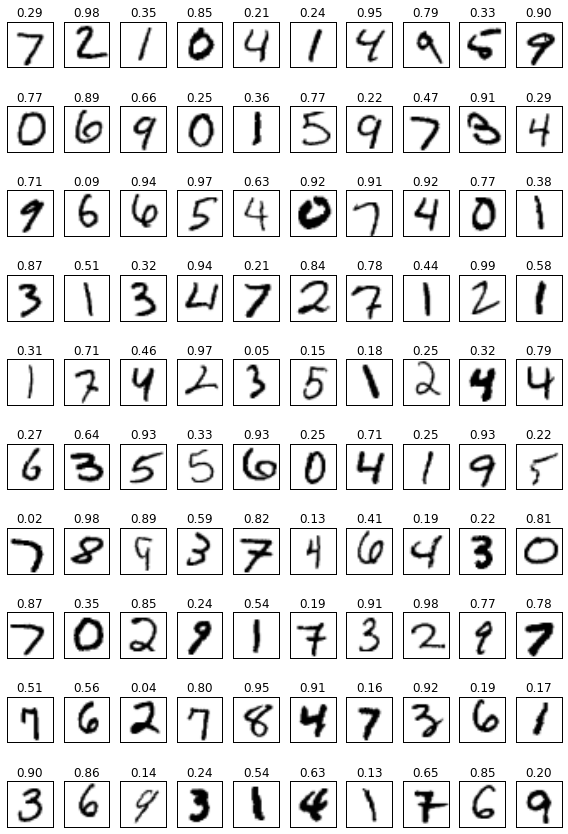

In [234]:
num_examples=10
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(x[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(x_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/SSL_generate_600')
plt.show()

In [248]:
gen_dis_real = sess.run(model.dis_real, feed_dict={model.x:generated_images})
#print gen_dis_real.T

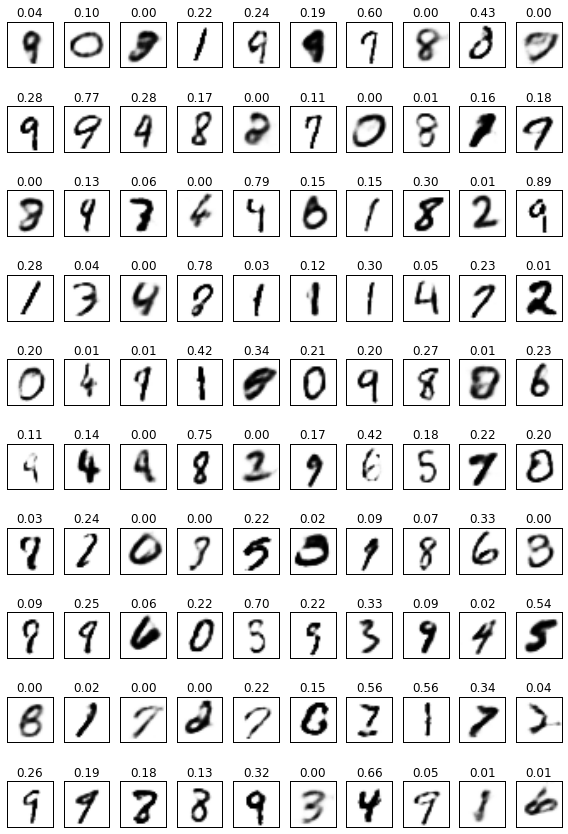

In [249]:
num_examples=10
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(gen_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.savefig('images/VAEGAN_gen')
plt.show()

In [237]:
rando = np.random.randn(100, 28*28)
rando_dis_real = sess.run(model.dis_real, feed_dict={model.x:rando})
print rando_dis_real.T

[[  1.06883666e-03   1.11611560e-02   9.87619281e-01   1.12801418e-02
    9.86715257e-01   9.87536371e-01   1.18777761e-02   1.24794180e-02
    9.86708760e-01   9.89755571e-01   9.91658628e-01   1.19465059e-02
    9.93945420e-01   9.88363862e-01   6.28433749e-03   9.85649526e-01
    9.57787871e-01   9.91823137e-01   1.21122077e-02   1.29619958e-02
    9.86859858e-01   1.28597701e-02   7.26109445e-02   9.85778809e-01
    1.13218213e-02   1.72166415e-02   9.89019573e-01   9.80982304e-01
    1.31620793e-02   9.97509599e-01   1.08707706e-02   8.00973177e-03
    9.89352942e-01   1.11107528e-02   1.25177782e-02   1.07887043e-02
    1.24626402e-02   1.29283201e-02   9.46099877e-01   1.12529295e-02
    1.13741206e-02   9.98092234e-01   2.86699086e-03   1.15349498e-02
    9.87835467e-01   8.25378597e-01   9.86484230e-01   2.20003916e-04
    9.76784289e-01   9.26358718e-03   9.83448923e-01   1.23523958e-02
    1.29241403e-02   9.84717667e-01   2.40597259e-02   5.22305816e-03
    9.87286031e-01  